In [39]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import re
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [40]:
import pandas as pd
# File paths
train_full_path = r"C:\Users\droxr\Downloads\senior_ds_test\train_full_data.csv"
train_only_enquiry_path = r"C:\Users\droxr\Downloads\senior_ds_test\train_data_only_enquiry.csv"
train_enquiry_n_account_path = r"C:\Users\droxr\Downloads\senior_ds_test\train_data_enquiry_n_account.csv"

test_full_path = r"C:\Users\droxr\Downloads\senior_ds_test\test_full_data.csv"
test_only_enquiry_path = r"C:\Users\droxr\Downloads\senior_ds_test\test_data_only_enquiry.csv"
test_enquiry_n_account_path = r"C:\Users\droxr\Downloads\senior_ds_test\test_data_enquiry_n_account.csv"


# Read CSVs
train_full_data = pd.read_csv(train_full_path)
train_data_only_enquiry = pd.read_csv(train_only_enquiry_path)
train_data_enquiry_n_account = pd.read_csv(train_enquiry_n_account_path)

test_full_data = pd.read_csv(test_full_path)
test_data_only_enquiry = pd.read_csv(test_only_enquiry_path)
test_data_enquiry_n_account = pd.read_csv(test_enquiry_n_account_path)

# Quick shape check
print("Train Full Data:", train_full_data.shape)
print("Train Only Enquiry:", train_data_only_enquiry.shape)
print("Train Enquiry + Account:", train_data_enquiry_n_account.shape)

print("Test Full Data:", test_full_data.shape)
print("Test Only Enquiry:", test_data_only_enquiry.shape)
print("Test Enquiry + Account:", test_data_enquiry_n_account.shape)


Train Full Data: (261383, 81)
Train Only Enquiry: (37466, 49)
Train Enquiry + Account: (223917, 81)
Test Full Data: (46127, 80)
Test Only Enquiry: (6555, 48)
Test Enquiry + Account: (39572, 80)


In [41]:


def encode_categorical(df, ignore_cols=["uid"], target_col="TARGET"):
    """
    Convert object/categorical columns to 0/1 (one-hot), drop original columns.
    ignore_cols: columns to skip (like uid)
    target_col: target column to skip
    """
    df = df.copy()
    cols_to_encode = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Exclude ignored and target columns
    cols_to_encode = [c for c in cols_to_encode if c not in ignore_cols + [target_col]]
    
    if cols_to_encode:
        print(f"Encoding {len(cols_to_encode)} categorical columns: {cols_to_encode}")
        df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
    else:
        print("No categorical columns found to encode.")
    
    return df

# Apply to all datasets
train_full_data = encode_categorical(train_full_data)
train_data_only_enquiry = encode_categorical(train_data_only_enquiry)
train_data_enquiry_n_account = encode_categorical(train_data_enquiry_n_account)

test_full_data = encode_categorical(test_full_data)
test_data_only_enquiry = encode_categorical(test_data_only_enquiry)
test_data_enquiry_n_account = encode_categorical(test_data_enquiry_n_account)


Encoding 2 categorical columns: ['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y']
Encoding 1 categorical columns: ['NAME_CONTRACT_TYPE_x']
Encoding 2 categorical columns: ['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y']
Encoding 2 categorical columns: ['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y']
Encoding 1 categorical columns: ['NAME_CONTRACT_TYPE_x']
Encoding 2 categorical columns: ['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y']


In [42]:
def drop_index_columns(df):
    """
    Drop index-like columns if present (e.g., 'index', 'Unnamed: 0').
    """
    df = df.copy()
    drop_cols = [c for c in ["index", "Unnamed: 0"] if c in df.columns]
    if drop_cols:
        print(f"Dropping index-like columns: {drop_cols}")
        df = df.drop(columns=drop_cols)
    return df

# Clean up index columns
train_full_data = drop_index_columns(train_full_data)
train_data_only_enquiry = drop_index_columns(train_data_only_enquiry)
train_data_enquiry_n_account = drop_index_columns(train_data_enquiry_n_account)

test_full_data = drop_index_columns(test_full_data)
test_data_only_enquiry = drop_index_columns(test_data_only_enquiry)
test_data_enquiry_n_account = drop_index_columns(test_data_enquiry_n_account)

# MODEL_1: Model for loan applicant with account data and enquiry data ( people who have already availed atleast one loan)

In [43]:
train_data_enquiry_n_account.head()

,uid,TARGET,enquiry_count_total,days_since_last_enquiry,enquiry_amt_sum,enquiry_amt_mean,enquiry_amt_median,enquiry_amt_max,enquiries_3m,enquiries_6m,enquiries_12m,amt_3m,amt_6m,amt_12m,enquiries_per_month,enquiry_types_count,enquiry_type_COUNT_another_type_of_loan,enquiry_type_COUNT_car_loan,enquiry_type_COUNT_cash_loan_non_earmarked,enquiry_type_COUNT_cash_loans,enquiry_type_COUNT_consumer_credit,enquiry_type_COUNT_credit_card,enquiry_type_COUNT_interbank_credit,enquiry_type_COUNT_loan_for_business_development,enquiry_type_COUNT_loan_for_purchase_of_shares_margin_lending,enquiry_type_COUNT_loan_for_the_purchase_of_equipment,enquiry_type_COUNT_loan_for_working_capital_replenishment,enquiry_type_COUNT_microloan,enquiry_type_COUNT_mobile_operator_loan,enquiry_type_COUNT_mortgage,enquiry_type_COUNT_real_estate_loan,enquiry_type_COUNT_revolving_loans,enquiry_type_COUNT_unknown_type_of_loan,amt_per_enquiry,max_to_mean_amt,mean_to_median_amt,sum_to_max_amt,recent_enquiry_ratio_3m,recent_enquiry_ratio_6m,recent_enquiry_ratio_12m,recent_amt_ratio_3m,recent_amt_ratio_6m,recent_amt_ratio_12m,enquiry_type_diversity,many_types_flag,large_recent_jump,enquiries_per_day,num_installments_total,num_missed_installments_total,num_non_missed_installments_total,overdue_ratio_mean,worst_dpd_ever_max,recent_worst_dpd_3m_max,last_month_dpd_max,installment_adherence_ratio_mean,regularly_missed_flag_any,dpd_30_count_total,dpd_60_count_total,dpd_90plus_count_total,account_age_months_mean,account_age_months_min,account_age_months_max,total_accounts,credit_types_count,credit_type_COUNT_another_type_of_loan,credit_type_COUNT_car_loan,credit_type_COUNT_cash_loan_non_earmarked,credit_type_COUNT_consumer_credit,credit_type_COUNT_credit_card,credit_type_COUNT_interbank_credit,credit_type_COUNT_loan_for_business_development,credit_type_COUNT_loan_for_purchase_of_shares_margin_lending,credit_type_COUNT_loan_for_the_purchase_of_equipment,credit_type_COUNT_loan_for_working_capital_replenishment,credit_type_COUNT_microloan,credit_type_COUNT_mobile_operator_loan,credit_type_COUNT_mortgage,credit_type_COUNT_real_estate_loan,credit_type_COUNT_unknown_type_of_loan,NAME_CONTRACT_TYPE_x_Revolving loans,NAME_CONTRACT_TYPE_y_Revolving loans
0,XDA69787158,0,2,1840,271000,135500.000000,135500.0,166000,0,0,0,0,0,0,0.032997,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,135500.000000,1.225092,1.000000,1.632530,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0,0,0.001087,39.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.645204,94.645204,94.645204,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,BSE47789733,0,3,1742,433000,144333.333333,150000.0,151000,0,0,0,0,0,0,0.045253,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,144333.333333,1.046189,0.962222,2.867550,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0,0,0.001722,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,82.818660,82.818660,82.818660,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,NTJ92213825,0,4,1799,482000,120500.000000,153500.0,167000,0,0,0,0,0,0,0.049236,3,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,120500.000000,1.385892,0.785016,2.886228,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0,0,0.002223,10.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,139.027595,139.027595,139.027595,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,TCQ47571695,0,1,1785,148000,148000.000000,148000.0,148000,0,0,0,0,0,0,0.017053,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,148000.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0,0,0.000560,70.0,0.0,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.331143,68.035480,132.621551,3.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,FZI10689602,0,18,1770,1541000,85611.111111,86500.0,182000,0,0,0,0,0,0,0.187515,10,0,0,3,3,3,2,2,1,1,0,1,0,0,0,0,1,1,85611.111111,2.125892,0.989724,8.467033,0.0,0.0,0.0,0.0,0.0,0.0,0.588235,1,0,0.010169,55.0,0.0,55.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,121.298730,88.830486,138.633377,3.0,1.0,0.0,0.0,0.0,3

In [52]:

def basic_classification_check(df, target_col="TARGET", ignore_cols=["uid"]):
    print("=== Basic Data Check ===")
    
    # Columns to consider
    cols = [c for c in df.columns if c not in ignore_cols]
    
    # 1. Missing values
    print("\nMissing values per column:")
    print(df[cols].isna().sum())
    
    # 2. Categorical columns
    cat_cols = df[cols].select_dtypes(include=['object', 'category']).columns.tolist()
    print("\nCategorical columns:")
    if cat_cols:
        print(cat_cols)
    else:
        print("None")
    
    # 3. Target column check
    if target_col in df.columns:
        print(f"\nTarget column '{target_col}' found. Distribution:")
        print(df[target_col].value_counts(dropna=False))
    else:
        print(f"\nTarget column '{target_col}' NOT found!")

#  usage
basic_classification_check(train_data_enquiry_n_account)


=== Basic Data Check ===

Missing values per column:
TARGET                                                           0
enquiry_count_total                                              0
days_since_last_enquiry                                          0
enquiry_amt_sum                                                  0
enquiry_amt_mean                                                 0
enquiry_amt_median                                               0
enquiry_amt_max                                                  0
enquiries_3m                                                     0
enquiries_6m                                                     0
enquiries_12m                                                    0
amt_3m                                                           0
amt_6m                                                           0
amt_12m                                                          0
enquiries_per_month                                              0
enquiry_t

In [53]:
""" Feature elimination """
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance_features(df, threshold=0.01):
    """Remove features with very low variance (near-constant)"""
    X = df.drop(columns=['uid', 'TARGET'], errors='ignore')
    
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X)
    selected_features = X.columns[selector.get_support()]
    
    print(f"Removed {len(X.columns) - len(selected_features)} low-variance features")
    return df[['uid', 'TARGET'] + selected_features.tolist()]

train_data_enquiry_n_account_1=remove_low_variance_features(train_data_enquiry_n_account,threshold=0.01)
len(train_data_enquiry_n_account_1.columns)



Removed 26 low-variance features


55

In [54]:

def remove_highly_correlated_features(df, threshold=0.95):
    """Remove highly correlated features to reduce redundancy"""
    numeric_cols = df.select_dtypes(include=['number']).columns
    numeric_cols = numeric_cols.drop(['uid', 'TARGET'], errors='ignore')
    
    corr_matrix = df[numeric_cols].corr().abs()
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    to_drop = [col for col in upper_tri.columns 
               if any(upper_tri[col] > threshold)]
    
    print(f"Removed {len(to_drop)} highly correlated features")
    return df.drop(columns=to_drop)

train_data_enquiry_n_account_2=remove_highly_correlated_features(train_data_enquiry_n_account_1,threshold=0.95)

Removed 6 highly correlated features


In [55]:
""" Base line pipeline """
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def baseline_credit_models(df, target_col="TARGET", ignore_cols=["uid"], test_size=0.2, random_state=42):
    df = df.copy()
    
    # === 1. Identify features ===
    X = df.drop(columns=ignore_cols + [target_col])
    y = df[target_col]
    
    # === 2. Handle categorical columns ===
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if cat_cols:
        print(f"Encoding categorical columns: {cat_cols}")
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
    
    # === 3. Handle missing values ===
    imputer = SimpleImputer(strategy='median')  # numeric median imputation
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
    # === 4. Train-test split ===
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    # === 5. Scaling for Logistic Regression ===
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # === 6. Initialize models ===
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=random_state),
        "Decision Tree": DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=random_state),
        "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=8, class_weight='balanced', random_state=random_state)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\n=== Training {name} ===")
        
        # Use scaled data only for Logistic Regression
        if name == "Logistic Regression":
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]
        
        # Metrics
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
        
        # Save results
        results[name] = {
            "model": model,
            "y_pred": y_pred,
            "y_proba": y_proba
        }
    
    return results




In [56]:

baseline_results = baseline_credit_models(train_data_enquiry_n_account_2)


=== Training Logistic Regression ===
Confusion Matrix:
[[23630 17703]
 [ 1339  2112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.57      0.71     41333
           1       0.11      0.61      0.18      3451

    accuracy                           0.57     44784
   macro avg       0.53      0.59      0.45     44784
weighted avg       0.88      0.57      0.67     44784

ROC-AUC Score: 0.6250

=== Training Decision Tree ===
Confusion Matrix:
[[25377 15956]
 [ 1499  1952]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     41333
           1       0.11      0.57      0.18      3451

    accuracy                           0.61     44784
   macro avg       0.53      0.59      0.46     44784
weighted avg       0.88      0.61      0.70     44784

ROC-AUC Score: 0.6132

=== Training Random Forest ===
Confusion Matrix:
[[28157 13176]
 [ 1718  1733]]

Clas

Logistic Regression: Best overall ROC AUC (0.66) and recall for defaulters (60%), but very low precision (many false alarms) and misses many non-defaulters.

Random Forest: Highest accuracy (68%) and majority class precision, but weakest ROC AUC (0.62) and poor at finding defaulters.

Decision Tree: Lowest recall for defaulters (48%), offers no clear advantage.

Main issue: Severe class imbalance. All models miss many real defaulters and produce too many false positives, making current predictions unreliable and risky for business use. None achieve a good balance of precision and recall.

**either we need to adress class imbalance problem or optimize threshold**

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# === Split features and target ===
def prepare_data(df, target_col="TARGET", ignore_cols=["uid"], test_size=0.2, random_state=42):
    # === 1. Identify features ===
    X = df.drop(columns=ignore_cols + [target_col])
    y = df[target_col]
    
    # === 2. Handle categorical columns ===
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if cat_cols:
        print(f"Encoding categorical columns: {cat_cols}")
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
    
    # === 3. Handle missing values ===
    imputer = SimpleImputer(strategy='median')  # numeric median imputation
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
    # === 4. Train-test split ===
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # === 5. Scale features ===
    scaler = StandardScaler(with_mean=False)  # safer for sparse-like data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test




In [58]:

##############################################################################
X_train, X_test, y_train, y_test = prepare_data(train_data_enquiry_n_account_2)

# L2 Regularization
lr_l2 = LogisticRegression(penalty="l2", solver="saga", max_iter=200, class_weight="balanced", random_state=42)
lr_l2.fit(X_train, y_train)

y_proba = lr_l2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("=== Logistic Regression (L2) ===")
print("ROC AUC:", round(roc_auc, 4))
print(classification_report(y_test, (y_proba >= 0.5).astype(int)))


=== Logistic Regression (L2) ===
ROC AUC: 0.625
              precision    recall  f1-score   support

           0       0.95      0.57      0.71     41333
           1       0.11      0.61      0.18      3451

    accuracy                           0.57     44784
   macro avg       0.53      0.59      0.45     44784
weighted avg       0.88      0.57      0.67     44784



In [59]:
#############################################################################################
# L1 Regularization
lr_l1 = LogisticRegression(penalty="l1", solver="saga", max_iter=200, class_weight="balanced", random_state=42)
lr_l1.fit(X_train, y_train)

y_proba = lr_l1.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("=== Logistic Regression (L1) ===")
print("ROC AUC:", round(roc_auc, 4))
print(classification_report(y_test, (y_proba >= 0.5).astype(int)))

=== Logistic Regression (L1) ===
ROC AUC: 0.625
              precision    recall  f1-score   support

           0       0.95      0.57      0.71     41333
           1       0.11      0.61      0.18      3451

    accuracy                           0.57     44784
   macro avg       0.53      0.59      0.45     44784
weighted avg       0.88      0.57      0.67     44784



In [60]:

#######################################################################################
# ElasticNet Regularization (mix of L1 + L2)
lr_elastic = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5,
                                max_iter=200, class_weight="balanced", random_state=42)
lr_elastic.fit(X_train, y_train)

y_proba = lr_elastic.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("=== Logistic Regression (ElasticNet, l1_ratio=0.5) ===")
print("ROC AUC:", round(roc_auc, 4))
print(classification_report(y_test, (y_proba >= 0.5).astype(int)))



=== Logistic Regression (ElasticNet, l1_ratio=0.5) ===
ROC AUC: 0.625
              precision    recall  f1-score   support

           0       0.95      0.57      0.71     41333
           1       0.11      0.61      0.18      3451

    accuracy                           0.57     44784
   macro avg       0.53      0.59      0.45     44784
weighted avg       0.88      0.57      0.67     44784



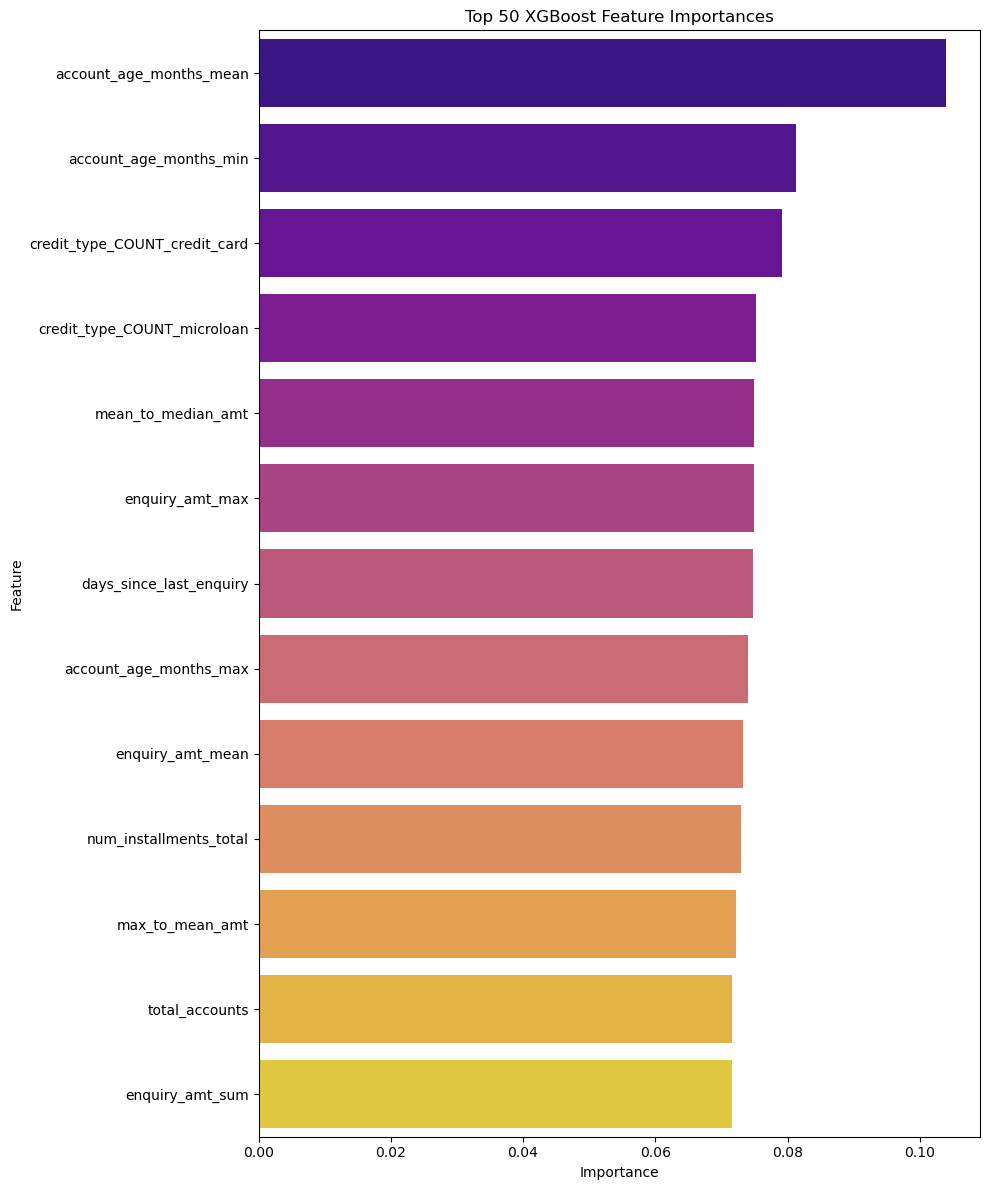

     Model  ROC-AUC  Accuracy  Precision  Recall  F1-Score
0  XGBoost   0.5739    0.7959     0.1136  0.2425    0.1548
                          Feature  Importance
7         account_age_months_mean    0.103905
8          account_age_months_min    0.081337
11  credit_type_COUNT_credit_card    0.079119
12    credit_type_COUNT_microloan    0.075270
5              mean_to_median_amt    0.074944
3                 enquiry_amt_max    0.074846
0         days_since_last_enquiry    0.074840
9          account_age_months_max    0.074066
2                enquiry_amt_mean    0.073261
6          num_installments_total    0.072939


In [61]:
#XGBOOST


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

def xgb_baseline_with_top_features(df, target_col="TARGET", ignore_cols=["uid"], test_size=0.2, random_state=42, top_n=50):
    df = df.copy()
    
    # --- 1. Features & Target ---
    X = df.drop(columns=ignore_cols + [target_col])
    y = df[target_col]
    
    # --- 2. Encode categorical features ---
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if cat_cols:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
    
    # --- 3. Handle missing values ---
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
    # --- 4. Train-test split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    # --- 5. Handle class imbalance ---
    pos = sum(y_train == 1)
    neg = sum(y_train == 0)
    scale_pos_weight = neg / pos
    
    # --- 6. Initialize XGBoost ---
    xgb_model = xgb.XGBClassifier(
        n_estimators=500,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric="logloss",   # avoids warning
        random_state=random_state,
        n_jobs=-1
    )
    
    # --- 7. Train ---
    xgb_model.fit(X_train, y_train)
    
    # --- 8. Predict & Evaluate ---
    y_pred = xgb_model.predict(X_test)
    y_proba = xgb_model.predict_proba(X_test)[:, 1]
    
    # Metrics
    roc_auc = roc_auc_score(y_test, y_proba)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_df = pd.DataFrame([{
        "Model": "XGBoost",
        "ROC-AUC": round(roc_auc, 4),
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4)
    }])
    
    # --- 9. Top N features ---
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    top_features = feature_importance.head(top_n)
    
    # Optional: plot top features
    plt.figure(figsize=(10, 12))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='plasma')
    plt.title(f"Top {top_n} XGBoost Feature Importances")
    plt.tight_layout()
    plt.show()
    
    return metrics_df, top_features, xgb_model
metrics_xgb, top_features_xgb, model_xgb = xgb_baseline_with_top_features(
    df=train_data_enquiry_n_account_3,   # replace with your dataframe
    target_col="TARGET",
    ignore_cols=["uid"],
    test_size=0.2,
    random_state=42,
    top_n=50
)

print(metrics_xgb)
print(top_features_xgb.head(10))

In [62]:
len(train_data_enquiry_n_account.columns)

81

In [63]:
#Light GBM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

def lgbm_baseline_with_top_features(df, target_col="TARGET", ignore_cols=["uid"], test_size=0.2, random_state=42, top_n=50):
    df = df.copy()
    
    # --- 1. Features & Target ---
    X = df.drop(columns=ignore_cols + [target_col])
    y = df[target_col]
    
    # --- 2. Encode categorical features ---
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    if cat_cols:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
    
    # --- 3. Handle missing values ---
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
    # --- 4. Train-test split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    # --- 5. Handle class imbalance ---
    pos = sum(y_train == 1)
    neg = sum(y_train == 0)
    scale_pos_weight = neg / pos
    
    # --- 6. Initialize LightGBM ---
    lgb_model = lgb.LGBMClassifier(
        n_estimators=500,
        scale_pos_weight=scale_pos_weight,
        random_state=random_state
    )
    
    # --- 7. Train ---
    lgb_model.fit(X_train, y_train)
    
    # --- 8. Predict & Evaluate ---
    y_pred = lgb_model.predict(X_test)
    y_proba = lgb_model.predict_proba(X_test)[:, 1]
    
    # Metrics
    roc_auc = roc_auc_score(y_test, y_proba)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_df = pd.DataFrame([{
        "Model": "LightGBM",
        "ROC-AUC": round(roc_auc, 4),
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4)
    }])
    
    # --- 9. Top N features ---
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': lgb_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    top_features = feature_importance.head(top_n)
    
    # Optional: plot top features
    plt.figure(figsize=(10, 12))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title(f"Top {top_n} LightGBM Feature Importances")
    plt.tight_layout()
    plt.show()
    
    return metrics_df, top_features, lgb_model





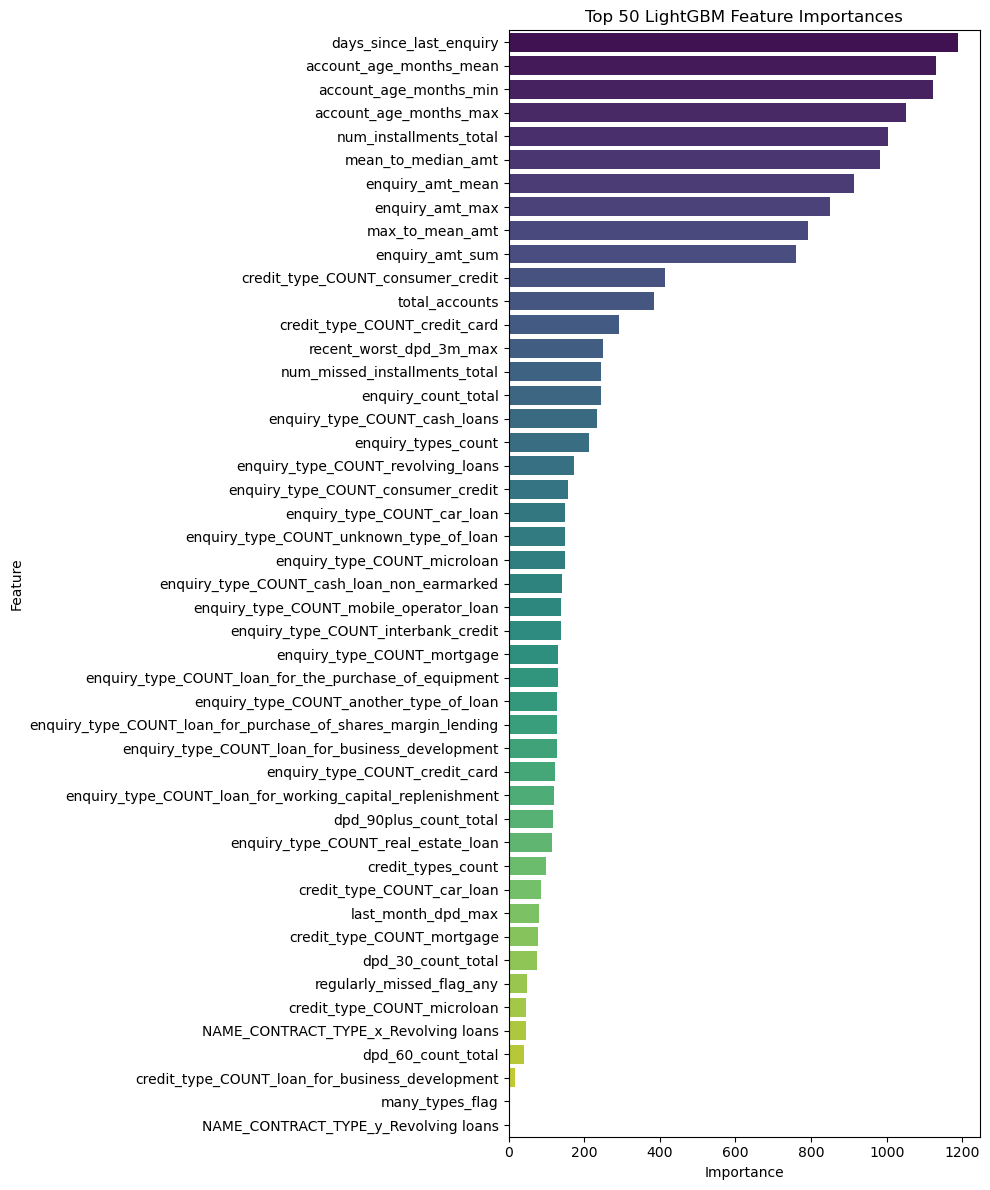

In [64]:
performance_df = lgbm_baseline_with_top_features(train_data_enquiry_n_account_2
, target_col="TARGET")


In [67]:
performance_df

(      Model  ROC-AUC  Accuracy  Precision  Recall  F1-Score
 0  LightGBM   0.6196    0.7201     0.1214  0.4222    0.1886,
                                               Feature  Importance
 1                             days_since_last_enquiry        1187
 34                            account_age_months_mean        1130
 35                             account_age_months_min        1121
 36                             account_age_months_max        1051
 26                             num_installments_total        1004
 24                                 mean_to_median_amt         981
 3                                    enquiry_amt_mean         913
 4                                     enquiry_amt_max         849
 23                                    max_to_mean_amt         792
 2                                     enquiry_amt_sum         759
 40                  credit_type_COUNT_consumer_credit         414
 37                                     total_accounts         385
 41   

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

def logistic_on_full_train(train_df, test_df, target_col="TARGET", ignore_cols=["uid"], random_state=42):
    train_df = train_df.copy()
    test_df = test_df.copy()

    # === 1. Identify features ===
    X_train = train_df.drop(columns=ignore_cols + [target_col])
    y_train = train_df[target_col]
    X_test = test_df.drop(columns=ignore_cols, errors="ignore")  # test has no TARGET

    # === 2. Handle categorical columns (encode consistently) ===
    cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    if cat_cols:
        print(f"Encoding categorical columns: {cat_cols}")
        X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
        X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

    # Align test to train columns
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    # === 3. Handle missing values ===
    imputer = SimpleImputer(strategy='median')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    # === 4. Scale data ===
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # === 5. Train Logistic Regression ===
    model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=random_state)
    model.fit(X_train_scaled, y_train)

    # === 6. Predictions on test set ===
    test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    test_pred_label = model.predict(X_test_scaled)

    # Attach to test_df
    test_df["pred_proba"] = test_pred_proba
    test_df["pred_label"] = test_pred_label

    return model, test_df


In [69]:
model, test_predictions = logistic_on_full_train(
    train_data_enquiry_n_account,
    test_data_enquiry_n_account,
    target_col="TARGET",
    ignore_cols=["uid"]
)

print(test_predictions[["uid", "pred_proba", "pred_label"]].head())

           uid  pred_proba  pred_label
0  CMO22835242    0.461198           0
1  MRJ34316727    0.688782           1
2  UAV00534378    0.501295           1
3  IPQ08190402    0.369841           0
4  NQN84331006    0.529711           1


In [ ]:
block

# for enquiry only model

In [70]:
train_data_only_enquiry.head()

,uid,TARGET,enquiry_count_total,days_since_last_enquiry,enquiry_amt_sum,enquiry_amt_mean,enquiry_amt_median,enquiry_amt_max,enquiries_3m,enquiries_6m,enquiries_12m,amt_3m,amt_6m,amt_12m,enquiries_per_month,enquiry_types_count,enquiry_type_COUNT_another_type_of_loan,enquiry_type_COUNT_car_loan,enquiry_type_COUNT_cash_loan_non_earmarked,enquiry_type_COUNT_cash_loans,enquiry_type_COUNT_consumer_credit,enquiry_type_COUNT_credit_card,enquiry_type_COUNT_interbank_credit,enquiry_type_COUNT_loan_for_business_development,enquiry_type_COUNT_loan_for_purchase_of_shares_margin_lending,enquiry_type_COUNT_loan_for_the_purchase_of_equipment,enquiry_type_COUNT_loan_for_working_capital_replenishment,enquiry_type_COUNT_microloan,enquiry_type_COUNT_mobile_operator_loan,enquiry_type_COUNT_mortgage,enquiry_type_COUNT_real_estate_loan,enquiry_type_COUNT_revolving_loans,enquiry_type_COUNT_unknown_type_of_loan,amt_per_enquiry,max_to_mean_amt,mean_to_median_amt,sum_to_max_amt,recent_enquiry_ratio_3m,recent_enquiry_ratio_6m,recent_enquiry_ratio_12m,recent_amt_ratio_3m,recent_amt_ratio_6m,recent_amt_ratio_12m,enquiry_type_diversity,many_types_flag,large_recent_jump,enquiries_per_day,NAME_CONTRACT_TYPE_y,NAME_CONTRACT_TYPE_x_Revolving loans
0,WJZ68772744,0,22,1716,2427000,110318.181818,109000.0,194000,0,0,0,0,0,0,0.271345,13,1,2,0,2,2,1,0,1,3,0,1,2,2,0,1,3,1,110318.181818,1.758550,1.012093,12.510309,0.0,0.0,0.0,0.0,0.0,0.0,0.764706,1,0,0.012821,NaN,False
1,DBK56652751,1,10,1706,986000,98600.000000,90000.0,187000,0,0,0,0,0,0,0.122692,7,0,0,2,2,1,0,1,2,0,1,1,0,0,0,0,0,0,98600.000000,1.896552,1.095556,5.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.411765,1,0,0.005862,NaN,False
2,VJY65237599,0,4,1763,317000,79250.000000,86500.0,137000,0,0,0,0,0,0,0.050860,4,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,79250.000000,1.728707,0.916185,2.313869,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0,0,0.002269,NaN,False
3,CDR05672029,0,4,1935,397000,99250.000000,100500.0,137000,0,0,0,0,0,0,0.057299,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,99250.000000,1.380353,0.987562,2.897810,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0,0,0.002067,NaN,False
4,GYL79147955,1,5,1699,427000,85400.000000,70000.0,148000,0,0,0,0,0,0,0.068007,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,85400.000000,1.733021,1.220000,2.885135,0.0,0.0,0.0,0.0,0.0,0.0,0.294118,0,0,0.002943,NaN,False


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# --- Prepare data ---
df = train_data_only_enquiry.copy()
ignore_cols = ['uid', 'NAME_CONTRACT_TYPE_y', 'NAME_CONTRACT_TYPE_x_Revolving loans']  # columns to ignore
target_col = 'TARGET'

X = df.drop(columns=ignore_cols + [target_col])
y = df[target_col]

# --- Handle missing values ---
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, stratify=y, random_state=42
)

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Logistic Regression ---
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)

# --- Predict and evaluate ---
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Logistic Regression ROC-AUC: {auc:.4f}")

# Optional: attach predictions to test set
test_preds = X_test.copy()
test_preds['y_true'] = y_test.values
test_preds['pred_proba'] = y_pred_proba


Logistic Regression ROC-AUC: 0.6058


In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# --- Prepare train and test ---
ignore_cols = ['uid', 'NAME_CONTRACT_TYPE_y', 'NAME_CONTRACT_TYPE_x_Revolving loans']  # columns to ignore
target_col = 'TARGET'

# Features and target
X_train = train_data_only_enquiry.drop(columns=ignore_cols + [target_col])
y_train = train_data_only_enquiry[target_col]

X_test = test_data_only_enquiry.drop(columns=ignore_cols, errors='ignore')  # test has no TARGET

# --- Handle missing values ---
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)  # align columns

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# --- Train Logistic Regression ---
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)

# --- Predict on test data ---
test_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
test_pred_label = logreg.predict(X_test_scaled)

# Attach predictions to test dataframe
test_data_only_enquiry['pred_proba'] = test_pred_proba
test_data_only_enquiry['pred_label'] = test_pred_label

# Preview predictions
print(test_data_only_enquiry[['uid', 'pred_proba', 'pred_label']].head())


           uid  pred_proba  pred_label
0  KDG11302428    0.396535           0
1  QMA11667107    0.360423           0
2  KVN06331593    0.510428           1
3  JSK35932732    0.559035           1
4  DBD72761763    0.507434           1


In [76]:
combined_test_df = pd.concat([test_data_only_enquiry, test_predictions], ignore_index=True, sort=False)


In [77]:
len(combined_test_df)

46127

In [78]:
# Save to CSV
combined_test_df.to_csv("final_submission_Anup_Rajbongshi.csv", index=False)

print("Saved final submission as 'final_submission_Anup_Rajbongshi.csv'")


Saved final submission as 'final_submission_Anup_Rajbongshi.csv'
